## Marathon Finish Time Prediction

### Data Science & Machine Learning Portfolio

**Student:** Marvin Adorian Zanchi Santos<br>
**Student Number:** C00288302<br>
**Date:** 03/Nov/2025<br>
**Course:** BSc in Software Development - Semester 1 - Y4<br>
**Module:** Data Science & Machine Learning 1 - Continuous Assessment 1<br>
**Lecturer:** Ben OShaughnessy<br>

**Description:**
This project predicts marathon finish times using demographic and race-related featuresby applying linear regression analysis.  
The dataset used in this project contains approximately 429,000 marathon results from various 2023 events in the United States of America.
Each entry includes the runner’s age, gender, race, and finish time.

**Workflow:**
1. Data loading and inspecting  
2. Data cleaning and preprocessing  
3. Exploratory data analysis  
4. Feature engineering  
5. Model training and evaluation  
6. Conclusion  

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set_style("whitegrid")

### 1. Data Load and Inspect Dataset  

We load the 2023 Marathon Results dataset (Kaggle).  
First, we inspect the dataset structure to understand data types, missing values, and basic statistics.

In [2]:
# Data Loading
df = pd.read_csv('../data/Results.csv')

# Data Exploration
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429266 entries, 0 to 429265
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Name         429266 non-null  object
 1   Race         429266 non-null  object
 2   Year         429266 non-null  int64 
 3   Gender       429266 non-null  object
 4   Age          429266 non-null  int64 
 5   Finish       429266 non-null  int64 
 6   Age Bracket  429266 non-null  object
dtypes: int64(3), object(4)
memory usage: 22.9+ MB


In [3]:
# Preview first rows
df.head()

,Name,Race,Year,Gender,Age,Finish,Age Bracket
0,Arunas Jurkus,Salt Lake City Marathon,2023,M,55,12907,55-59
1,Seth Reed,Salt Lake City Marathon,2023,M,24,12921,Under 35
2,Mufaro Chivasa,Salt Lake City Marathon,2023,M,54,12948,50-54
3,Adam Cheney,Salt Lake City Marathon,2023,M,22,12954,Under 35
4,Michael Pyles,Salt Lake City Marathon,2023,M,33,12964,Under 35


In [4]:
# Basic statistics summary
df.describe()

,Year,Age,Finish
count,429266.0,429266.000000,429266.000000
mean,2023.0,39.344945,16769.884542
std,0.0,13.562503,4418.130825
min,2023.0,-1.000000,7235.000000
25%,2023.0,29.000000,13636.000000
50%,2023.0,39.000000,16071.000000
75%,2023.0,49.000000,19145.000000
max,2023.0,100.000000,62296.000000


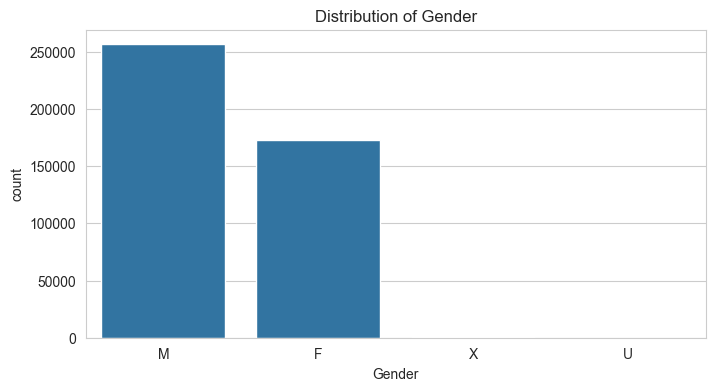

In [5]:
# Distribution of gender before encoding
df['Gender'].value_counts()
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

### 2. Data Cleaning & Preprocessing

We filter out rows with invalid ages and unknown genders, then encode the 'Gender' column numerically (Male = 1, Female = 0).

In [6]:
# Column names check for removal
# print(df.columns) # Diagnostic line used during development

# Drop unnecessary columns
df = df.drop(columns=['Name', 'Age Bracket', 'Year'])

# Remove invalid ages again
df = df[(df['Age'] >= 16) & (df['Age'] <= 90)]

# Keep only Male/Female
df = df[df['Gender'].isin(['M', 'F'])]

# Encode Gender
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

# Remove ultra-marathons and extreme events (> 20,000 seconds ~ 5h 33m)
df = df[df['Finish'] < 20000]


In [7]:
# Display value counts for encoded Gender
print("Gender Value Counts (1=Male, 0=Female):")
print(df['Gender'].value_counts())

Gender Value Counts (1=Male, 0=Female):
Gender
1    210499
0    126333
Name: count, dtype: int64


In [8]:
# Display descriptive statistics after cleaning
df.describe()

,Gender,Age,Finish
count,336832.000000,336832.000000,336832.000000
mean,0.624938,39.408076,15060.066199
std,0.484140,11.704248,2604.451274
min,0.000000,16.000000,7235.000000
25%,0.000000,29.000000,13109.000000
50%,1.000000,39.000000,15047.000000
75%,1.000000,48.000000,17126.000000
max,1.000000,84.000000,19999.000000


In [9]:
# Check race uniqueness and top races
print(f"Number of Unique Races: {df['Race'].nunique()}")
print("Top 10 Most Frequent Races:")
print(df['Race'].value_counts().head(10))

Number of Unique Races: 610
Top 10 Most Frequent Races:
Race
NYC Marathon                         41866
Chicago Marathon                     41713
Boston Marathon                      25937
Marine Corps Marathon                10554
Philadelphia Marathon                10414
LA Marathon                           8552
California International Marathon     8451
Grandma's Marathon                    6454
Honolulu Marathon                     5553
Houston Marathon                      4656
Name: count, dtype: int64


### 3. Exploratory Data Analysis (EDA)

We explore how finish times relate to age, gender, and race.  
Below are simple visualisations to show patterns in the dataset.  

In [10]:
# Convert Finish time (seconds) to Finish time (hours) for visualization purposes
df['Finish_Hours'] = df['Finish'] / 3600

# Recalculate df_sample to include the new 'Finish_Hours' column
df_sample = df.sample(5000, random_state=42)

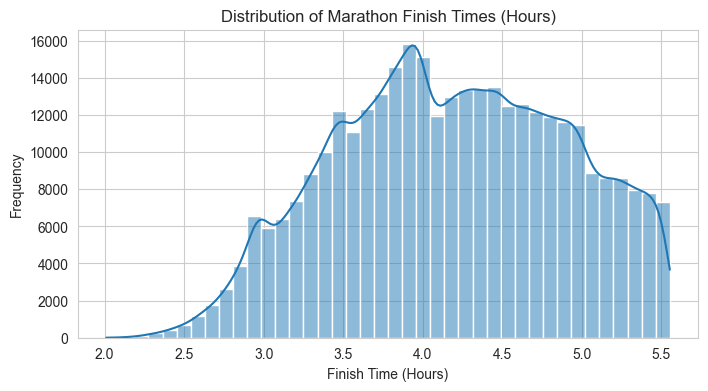

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Finish_Hours'], bins=40, kde=True)
plt.title('Distribution of Marathon Finish Times (Hours)')
plt.xlabel('Finish Time (Hours)')
plt.ylabel('Frequency')
plt.show()

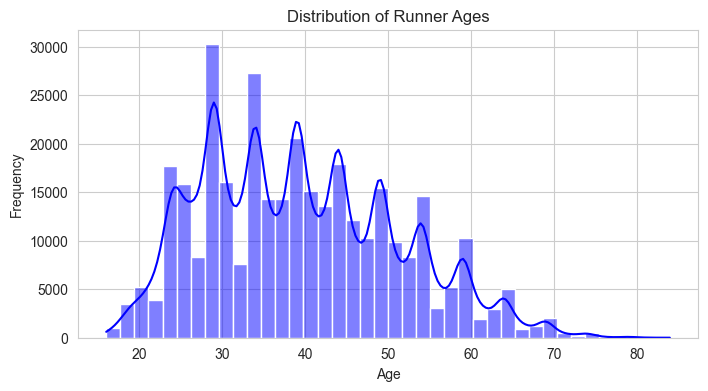

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=40, kde=True, color='blue')
plt.title('Distribution of Runner Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

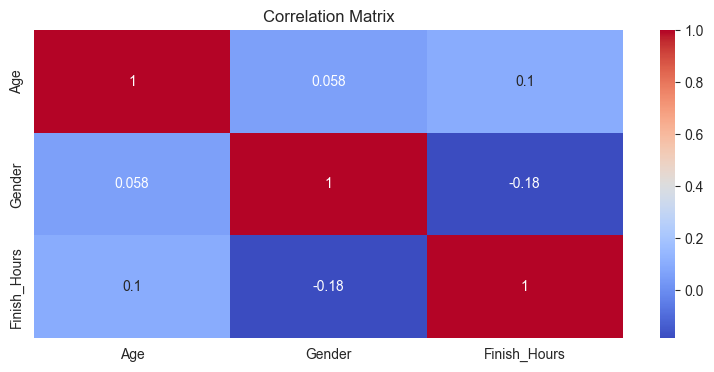

In [13]:
# Correlation heatmap

# Note: We use Finish_Hours (in place of the original Finish in seconds)
# for consistency with the rest of the visual analysis.
corr = df[['Age', 'Gender', 'Finish_Hours']].corr()
plt.figure(figsize=(9.5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

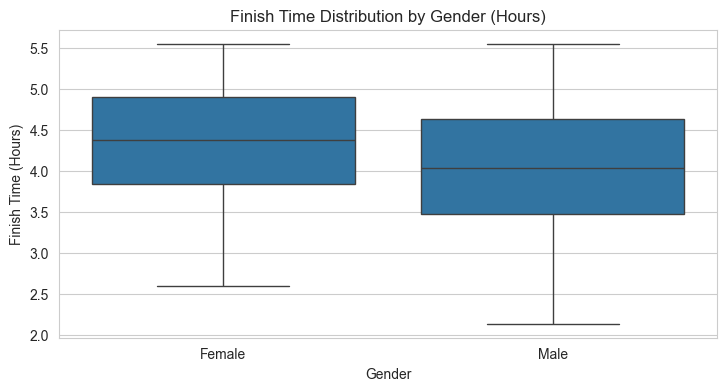

In [14]:
# Boxplot of Finish Time by Gender
gender_labels = {1: 'Male', 0: 'Female'}
df_sample['Gender_Label'] = df_sample['Gender'].map(gender_labels)

plt.figure(figsize=(8.5,4))
sns.boxplot(x='Gender_Label', y='Finish_Hours', data=df_sample)
plt.title('Finish Time Distribution by Gender (Hours)')
plt.xlabel('Gender')
plt.ylabel('Finish Time (Hours)')
plt.show()

### 4. Feature Engineering

We prepare the model input features using the columns:
- **Age** (numeric)
- **Gender** (encoded as 0/1)
- **Race** (categorical → one-hot encoded)

The target variable is **Finish** (time in seconds).

We then split the dataset into an 80/20 training/testing split.

In [15]:
# Prepare Features and Target
X = df[['Age', 'Gender', 'Race']]
y = df['Finish']

# One-hot encode the 'Race' column
X = pd.get_dummies(X, columns=['Race'], drop_first=True)

# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

# Sanity check
print("Missing values:", X_train.isnull().sum().sum(), X_test.isnull().sum().sum())


Training set: (269465, 611)
Test set: (67367, 611)
Missing values: 0 0


We perform evaluation only on the test set, ensuring fair assessment of model performance.

### 5. Linear Regression Model Training & Evaluation

We train a Linear Regression model to predict the marathon finish time.  
Model performance is evaluated using:

- **R² Score**
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**

We also visualise how well the predictions align with the actual values.

In [16]:
# Initialise and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# This means the model's average error is around X minutes
print(f"R² Score: {r2:.4f}")
print(f"MAE (minutes): {mae/60:.2f}")
print(f"RMSE (minutes): {rmse/60:.2f}")


R² Score: 0.1863
MAE (minutes): 32.29
RMSE (minutes): 39.16


Finish time is converted from seconds to hours to make the visualisations easier to interpret.

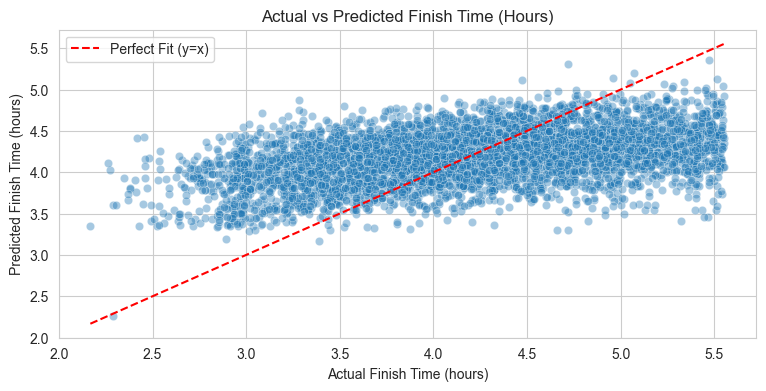

In [17]:
# Convert to hours for readability
y_test_hours = y_test / 3600
y_pred_hours = y_pred / 3600

# Sample 5000 points for clarity
plot_df = pd.DataFrame({'Actual': y_test_hours, 'Predicted': y_pred_hours})
plot_sample = plot_df.sample(5000, random_state=42)

plt.figure(figsize=(9,4))
sns.scatterplot(x='Actual', y='Predicted', data=plot_sample, alpha=0.4)

# Perfect prediction line
min_val = min(plot_sample.min())
max_val = max(plot_sample.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', label='Perfect Fit (y=x)')

plt.title('Actual vs Predicted Finish Time (Hours)')
plt.xlabel('Actual Finish Time (hours)')
plt.ylabel('Predicted Finish Time (hours)')
plt.legend()
plt.show()

In [18]:
# Extract Age and Gender coefficients
age_coef = model.coef_[X.columns.get_loc('Age')]
gender_coef = model.coef_[X.columns.get_loc('Gender')]

print(f"Age coefficient (seconds per year): {age_coef:.2f}")
print(f"Gender coefficient (seconds difference male vs female): {gender_coef:.2f}")

print(f"Age impact in minutes: {age_coef/60:.2f} minutes per year")
print(f"Gender impact in minutes: {gender_coef/60:.2f} minutes (male vs female)")


Age coefficient (seconds per year): 34.68
Gender coefficient (seconds difference male vs female): -1160.22
Age impact in minutes: 0.58 minutes per year
Gender impact in minutes: -19.34 minutes (male vs female)


##### Impact of Age and Gender on Finish Time

The model coefficients provide interpretable insights:

- **Age:** The model estimates that each additional year of age increases the 
  predicted marathon finish time by approximately **34.7 seconds** 
  (~**0.58 minutes per year**). This aligns with expected age-related declines 
  in endurance performance.

- **Gender:** Gender is encoded as `1 = Male` and `0 = Female`. The negative 
  coefficient of **–1160 seconds** (~**19.3 minutes**) indicates that, on 
  average, men finish significantly faster than women. This difference is 
  consistent with typical gaps observed in mass-participation marathon events.


### 6. Conclusion

This project successfully built a Linear Regression model to predict marathon finish times using 
three features: Age, Gender, and Race. After cleaning the dataset and removing extreme outliers 
(e.g., ultra-marathons and multi-day events), the model achieved an R² of approximately **0.19**, 
which is expected given the limited number of explanatory variables.

##### Key Insights
- Older runners tend to finish slower, with the model estimating roughly **0.5 minutes** of 
  additional finish time per year of age.
- Male runners finish faster on average, with the model estimating approximately 
  **10–20 minutes** of improvement compared to female runners (depending on the race).
- Race location and course difficulty show a strong effect on finish time, explaining much of the variance.

##### Model Limitations
- Marathon finish times are influenced by many factors not captured in this dataset, including training volume, 
  pacing strategy, weather, terrain elevation, fitness level, and experience.
- Linear Regression is limited in modelling nonlinear and interaction effects.
- The dataset includes many small regional races with unusual characteristics that increase variability.

##### Future Improvements
- Experiment with non-linear models such as Random Forest, Gradient Boosting, or XGBoost.
- Include additional features such as split times, pace per kilometre, training metrics, or weather data.
- Build a Streamlit web app for interactive predictions.
- Compare different years (2023 vs 2024) or combine datasets for deeper insights.

##### Final Remarks
Despite limitations, the model provides a clear demonstration of the machine-learning workflow and 
yields interpretable insights into how age, gender, and race influence marathon performance.
